In [2]:
canciones = []
discursos = []
noticias = []

with open("canciones.txt") as f:
    text = f.read()
    canciones = text.split("===")

with open("discursos.txt") as f:
    text = f.read()
    discursos = text.split("===")

with open("noticias.txt") as f:
    text = f.read()
    noticias = text.split("===")
print(len(canciones))
print(len(discursos))
print(len(noticias))

10
10
10


In [3]:
import spacy
import numpy as np

In [4]:
def extract_embedding(text: str, nlp: spacy.Language) -> np.ndarray:
    doc = nlp(text)
    return doc.vector

In [5]:
nlp = nlp = spacy.load("es_core_news_md")

texts = canciones + discursos + noticias
embeddings = np.array([extract_embedding(text, nlp) for text in texts])
embeddings[:4, :]

array([[ 0.10320353,  0.43177208, -2.1874635 , ..., -0.37995973,
        -0.04612016, -0.11635862],
       [ 0.04980777,  1.2431997 , -0.3041415 , ...,  0.43380243,
         0.4269659 , -0.13013136],
       [ 0.27629635,  0.3408144 , -0.9200793 , ...,  0.23613507,
        -0.25766134, -0.96911967],
       [ 0.75053644,  1.0817664 , -0.9476533 , ..., -0.10028568,
        -0.30664998, -0.29547498]], dtype=float32)

In [6]:
len(embeddings[1])

300

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [8]:
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings)
embeddings_3d.shape

(30, 3)

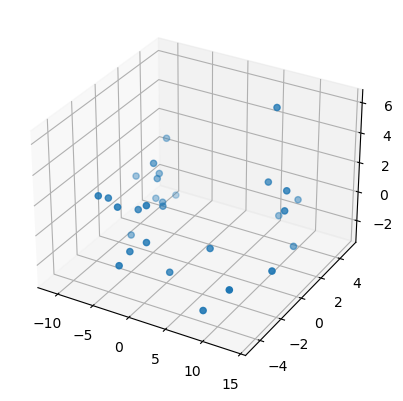

In [9]:
fig = plt.figure()

ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    embeddings_3d[:, 0],
    embeddings_3d[:, 1],
    embeddings_3d[:, 2],
)

In [11]:
color = [2 for i in discursos] + [3 for i in noticias] + [4 for i in canciones]
color

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [12]:
pca2 = PCA(n_components=2)
embeddings_2d = pca2.fit_transform(embeddings)

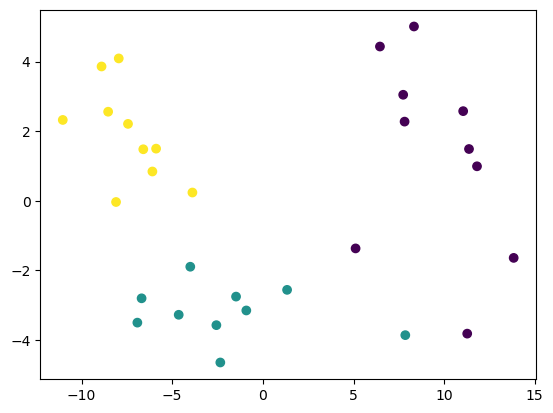

In [14]:
plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1],c=color)

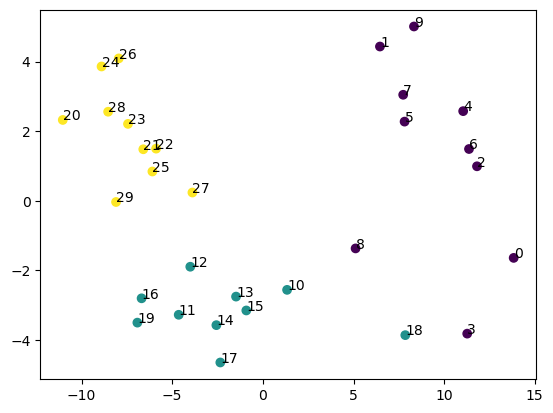

In [15]:
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=color)

# Etiquetar cada punto con su índice
for i, txt in enumerate(texts):
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], str(i))

# Mostrar el gráfico
plt.show()

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular la similitud de coseno entre los vectores de incrustación
similarity_matrix = cosine_similarity(embeddings)

# Imprimir la matriz de similitud
print(similarity_matrix)


[[ 0.9999999   0.6685765   0.8462318   0.90207183  0.87734723  0.779113
   0.84051585  0.70179975  0.7748369   0.71441084  0.5902777   0.36183387
   0.34726328  0.46822315  0.43835318  0.53388333  0.24934603  0.45639697
   0.83060634  0.25849852  0.00140122  0.14707364  0.15725182  0.0600834
  -0.08292224  0.18673424  0.03966629  0.29251587  0.02719104  0.11440295]
 [ 0.6685765   1.          0.63494015  0.65403247  0.59236455  0.61670506
   0.59255517  0.5818681   0.65718675  0.5316986   0.5920701   0.43312693
   0.40090412  0.46192095  0.48698482  0.52132857  0.3596658   0.49467403
   0.6375971   0.3908686   0.24111715  0.21659037  0.34870344  0.22929318
   0.13653699  0.29879308  0.22808945  0.432883    0.23179866  0.2841577 ]
 [ 0.8462318   0.63494015  1.          0.80611163  0.7760856   0.729933
   0.77688384  0.70522356  0.6943706   0.6268281   0.54679227  0.34737235
   0.3334672   0.44399345  0.41530973  0.5073179   0.24872842  0.43225837
   0.68683404  0.25657707  0.03841403  0.

In [17]:

indice_texto_interes = 2  

similarity_scores = cosine_similarity(embeddings[indice_texto_interes].reshape(1, -1), embeddings)

indices_mas_similares = similarity_scores.argsort()[0][::-1]

print("Textos más similares al texto de interés:")
for indice in indices_mas_similares[1:]:
    print(f"Índice: {indice}, Similitud: {similarity_scores[0][indice]}")

Textos más similares al texto de interés:
Índice: 0, Similitud: 0.8462316989898682
Índice: 3, Similitud: 0.8061115145683289
Índice: 6, Similitud: 0.7768838405609131
Índice: 4, Similitud: 0.7760856747627258
Índice: 5, Similitud: 0.7299332022666931
Índice: 7, Similitud: 0.7052235007286072
Índice: 8, Similitud: 0.6943706274032593
Índice: 18, Similitud: 0.6868340969085693
Índice: 1, Similitud: 0.6349401473999023
Índice: 9, Similitud: 0.6268280744552612
Índice: 10, Similitud: 0.5467922687530518
Índice: 15, Similitud: 0.5073181390762329
Índice: 13, Similitud: 0.443993479013443
Índice: 17, Similitud: 0.43225839734077454
Índice: 14, Similitud: 0.41530972719192505
Índice: 11, Similitud: 0.3473723828792572
Índice: 12, Similitud: 0.33346718549728394
Índice: 27, Similitud: 0.27017736434936523
Índice: 19, Similitud: 0.2565770745277405
Índice: 16, Similitud: 0.24872839450836182
Índice: 25, Similitud: 0.19144350290298462
Índice: 22, Similitud: 0.15487028658390045
Índice: 21, Similitud: 0.140341639518

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(embeddings)

indice_texto_interes = 2

similarity_scores = cosine_similarity(embeddings[indice_texto_interes].reshape(1, -1), embeddings)

indices_mas_similares = similarity_scores.argsort()[0][::-1]

print("\nTextos más similares al texto de interés:")
for indice in indices_mas_similares[1:]:
    categoria_texto_similar = None

    if indice <= 9:
        categoria_texto_similar = "discursos"
    elif indice <= 19 and indice >= 10  :
        categoria_texto_similar = "noticias"
    else:
        categoria_texto_similar = "canciones"

    print(f"Índice: {indice}, Similitud: {similarity_scores[0][indice]}, Categoría: {categoria_texto_similar}")



Textos más similares al texto de interés:
Índice: 0, Similitud: 0.8462316989898682, Categoría: discursos
Índice: 3, Similitud: 0.8061115145683289, Categoría: discursos
Índice: 6, Similitud: 0.7768838405609131, Categoría: discursos
Índice: 4, Similitud: 0.7760856747627258, Categoría: discursos
Índice: 5, Similitud: 0.7299332022666931, Categoría: discursos
Índice: 7, Similitud: 0.7052235007286072, Categoría: discursos
Índice: 8, Similitud: 0.6943706274032593, Categoría: discursos
Índice: 18, Similitud: 0.6868340969085693, Categoría: noticias
Índice: 1, Similitud: 0.6349401473999023, Categoría: discursos
Índice: 9, Similitud: 0.6268280744552612, Categoría: discursos
Índice: 10, Similitud: 0.5467922687530518, Categoría: noticias
Índice: 15, Similitud: 0.5073181390762329, Categoría: noticias
Índice: 13, Similitud: 0.443993479013443, Categoría: noticias
Índice: 17, Similitud: 0.43225839734077454, Categoría: noticias
Índice: 14, Similitud: 0.41530972719192505, Categoría: noticias
Índice: 11,

In [22]:
from sklearn.metrics.pairwise import euclidean_distances

centroid_farandula = np.mean(embeddings[:len(discursos)], axis=0)
centroid_politica = np.mean(embeddings[len(discursos):len(discursos) + len(noticias)], axis=0)
centroid_deportes = np.mean(embeddings[len(discursos) + len(noticias):], axis=0)

centroids = [centroid_farandula, centroid_politica, centroid_deportes]
categories = ['farandula', 'politica', 'deportes']

distance_matrix = euclidean_distances(centroids, centroids)

print("Matriz de Distancias entre Categorías:")
print(distance_matrix)


Matriz de Distancias entre Categorías:
[[ 0.        12.446772  16.997547 ]
 [12.446772   0.         7.6434946]
 [16.997547   7.6434946  0.       ]]


In [23]:
from scipy.spatial.distance import cdist
category_distances = cdist(embeddings, embeddings, metric='cosine')

average_distances = {
    "discursos-noticias": np.mean(category_distances[:len(discursos), len(discursos):len(discursos)+len(noticias)]),
    "discursos-canciones": np.mean(category_distances[:len(discursos), -len(canciones):]),
    "noticias-canciones": np.mean(category_distances[-len(noticias):, -len(canciones):])
}

print("\nDistancia promedio entre categorías:")
for key, value in average_distances.items():
    print(f"{key}: {value}")


Distancia promedio entre categorías:
discursos-noticias: 0.4819667393934284
discursos-canciones: 0.7565563053545462
noticias-canciones: 0.10025497247822263
